In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openpyxl

In [2]:
# Установка зависимостей
# %pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
# %pip install git+https://github.com/openai/CLIP.git
# %pip install pycocotools pillow

In [3]:
# Создание финального DataFrame для сравнения моделей
comparison_df = pd.DataFrame({
    "Model": ["ViT-B/32", "CLIP.PT"],
    "Recall@1": [0.8616, 0.8686],
    "Recall@5": [0.9912, 0.9918],
    "MRR": [0.9191, 0.9236]
})

# Экспорт в Excel
with pd.ExcelWriter("experiment_results.xlsx") as writer:
    comparison_df.to_excel(writer, sheet_name="Comparison", index=False)

print("Файл Excel успешно создан: experiment_results.xlsx")

Файл Excel успешно создан: experiment_results.xlsx


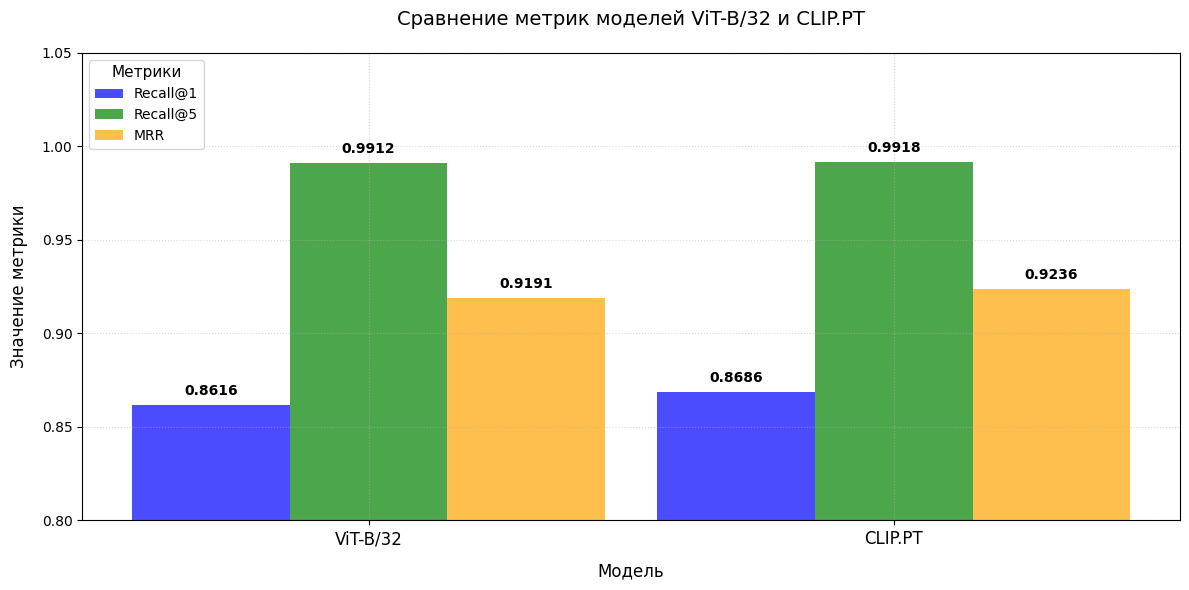

In [4]:
# Цвета для графиков (добавлен третий цвет)
colors = ['blue', 'green', 'orange']

# Создание столбчатой диаграммы для метрик
plt.figure(figsize=(12, 6))

# Метрики для отображения
metrics = ["Recall@1", "Recall@5", "MRR"]

# Построение столбчатой диаграммы для каждой метрики
for i, metric in enumerate(metrics):
    plt.bar(
        [x + i*0.3 for x in range(len(comparison_df["Model"]))],  # Увеличили смещение до 0.3
        comparison_df[metric],
        width=0.3,  # Ширина столбцов
        color=colors[i],
        alpha=0.7,
        label=metric
    )

# Добавление аннотаций (значений метрик на столбцах)
for i, metric in enumerate(metrics):
    for j, value in enumerate(comparison_df[metric]):
        plt.annotate(
            f"{value:.4f}",  # 4 знака после запятой
            (j + i*0.3, value),  # Обновленное смещение
            textcoords="offset points",
            xytext=(0, 5),
            ha='center',
            va='bottom',  # Выравнивание по низу
            fontsize=10,
            fontweight='bold'
        )

# Настройка графика
plt.title("Сравнение метрик моделей ViT-B/32 и CLIP.PT", fontsize=14, pad=20)
plt.xlabel("Модель", fontsize=12, labelpad=10)
plt.ylabel("Значение метрики", fontsize=12, labelpad=10)
plt.xticks(
    [x + 0.3 for x in range(len(comparison_df["Model"]))],  # Обновленное смещение
    comparison_df["Model"],
    fontsize=12
)
plt.ylim(0.8, 1.05)  # Установим пределы оси Y
plt.legend(
    loc='upper left',
    fontsize=10,
    title='Метрики',
    title_fontsize='11'
)
plt.grid(True, linestyle=':', alpha=0.5)

# Сохранение графика в файл
plt.tight_layout()  # Улучшенное расположение элементов
plt.savefig("model_comparison_metrics_bar.png", dpi=300, bbox_inches='tight')
plt.show()